In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [5]:
import os
os.getcwd()

'C:\\Users\\ravip\\Documents\\Regression'

# Step 1: Data Collection

In [6]:
data_df = pd.read_csv(os.getcwd()+'\Data\Housing.csv')

# Step 2: Data Health check


In [7]:
data_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
data_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
data_df['parking'].value_counts()

parking
0    299
1    126
2    108
3     12
Name: count, dtype: int64

In [10]:
data_df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Step 3: EDA

# Assumption 1: Linearity

In [11]:
data_df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [12]:
data_df['log_area'] = data_df['area'].apply(lambda x: math.log(x))
data_df['log_price'] = data_df['price'].apply(lambda x: math.log(x))

In [13]:
cont_idvs = ['area', 'log_area']
cat_idvs = ['bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']
dv = 'price'

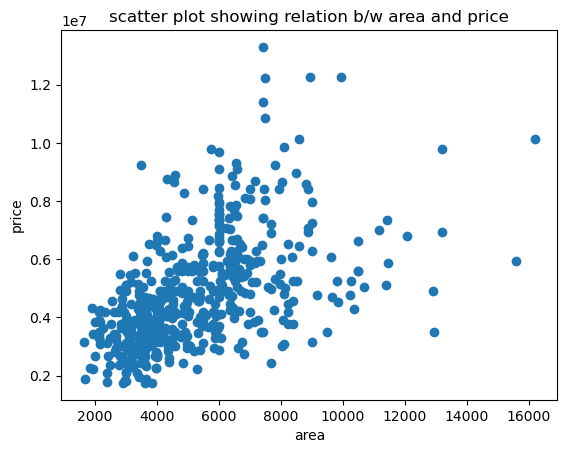

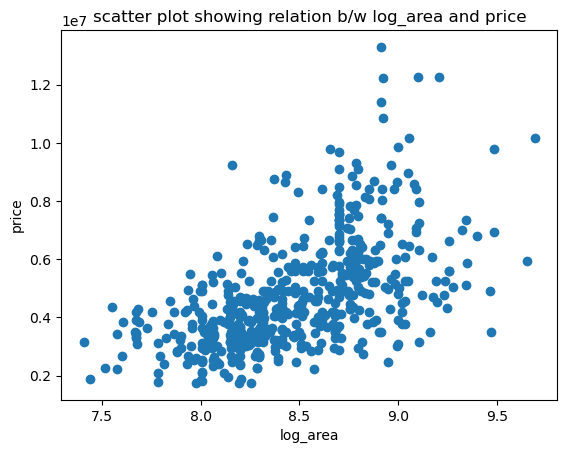

In [14]:
for col in cont_idvs:
    plt.scatter(data_df[col], data_df[dv])
    plt.xlabel(col)
    plt.ylabel(dv)
    plt.title('scatter plot showing relation b/w {} and {}'.format(col, dv))
    plt.show()

In [15]:
data_df[cont_idvs+['price']].corr()

,area,log_area,price
area,1.000000,0.964328,0.535997
log_area,0.964328,1.000000,0.561231
price,0.535997,0.561231,1.000000


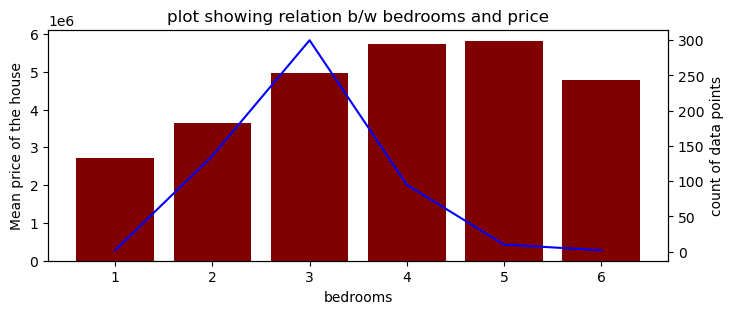

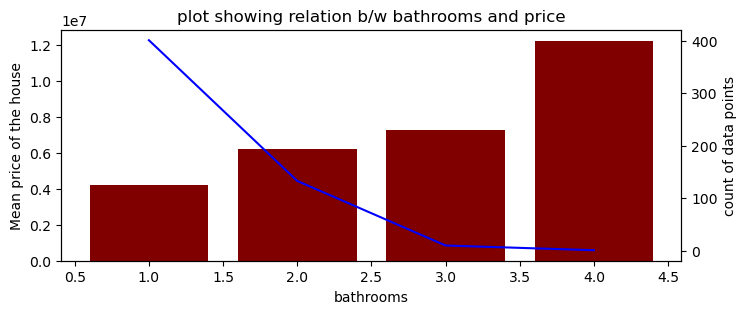

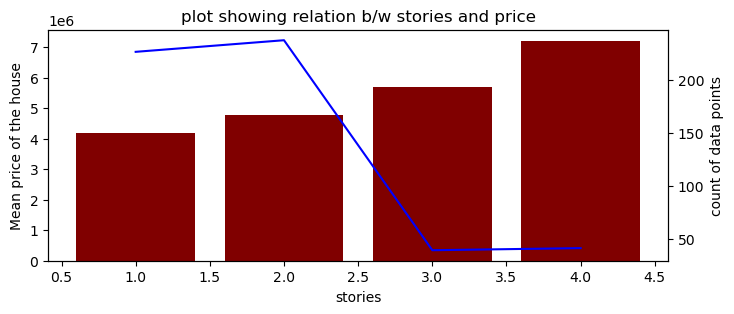

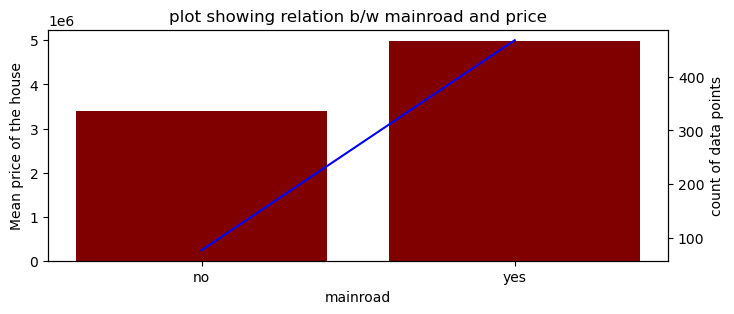

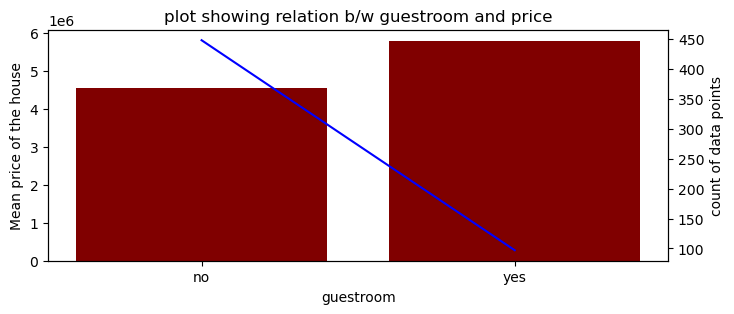

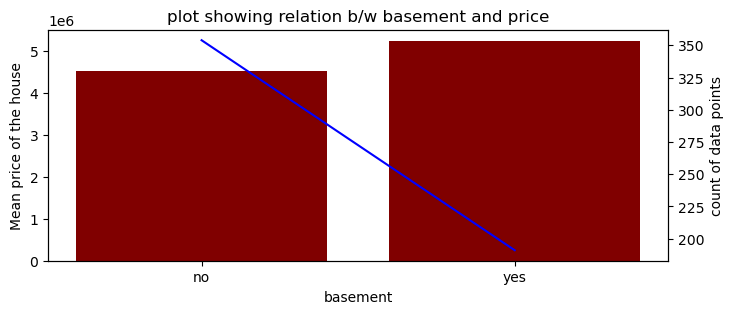

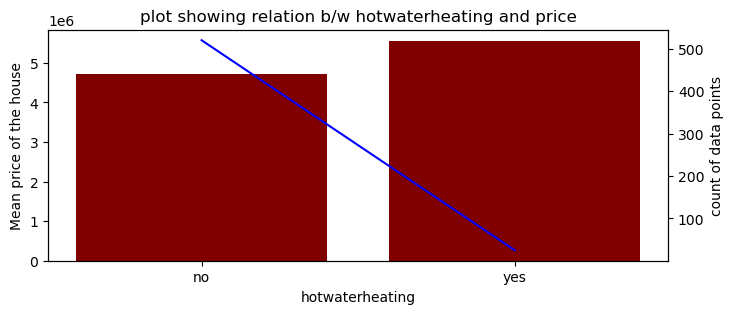

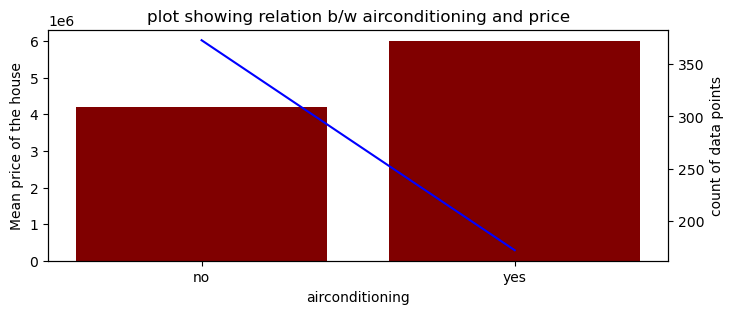

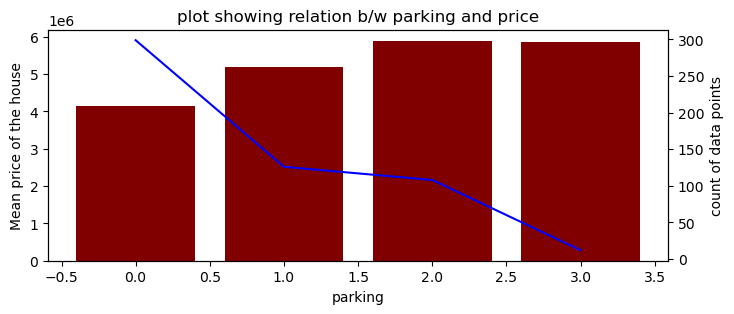

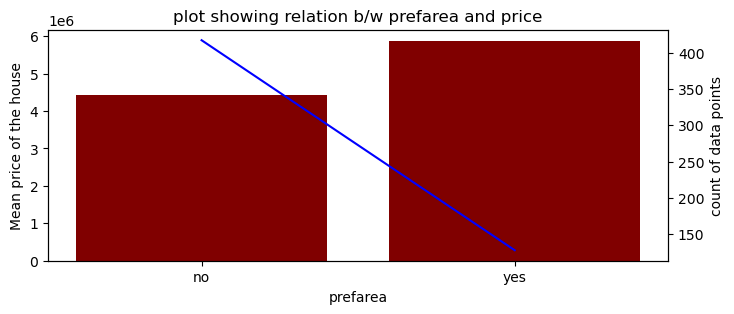

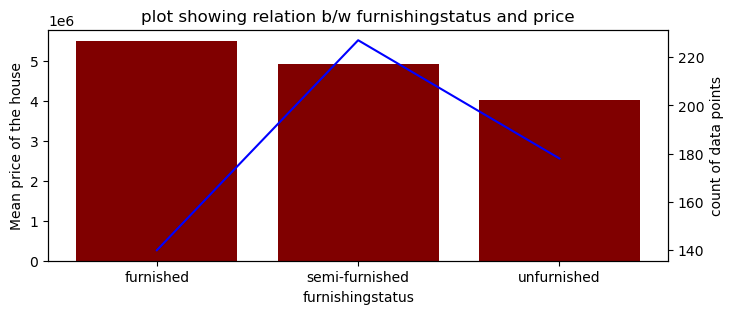

In [16]:
for col in cat_idvs:
    fig, ax1 = plt.subplots(figsize=(8, 3))
    ax2 = ax1.twinx()
    df = data_df.groupby(col).agg(mean=(dv, 'mean'),
                                  count=(dv,'count')).reset_index()
    ax1.bar(df[col], df['mean'], color ='maroon')
    ax2.plot(df[col], df['count'], color ='blue')
    ax1.set_xlabel(col)
    ax1.set_ylabel('Mean price of the house')
    ax2.set_ylabel('count of data points')
    plt.title('plot showing relation b/w {} and {}'.format(col, dv))
    plt.show()

# Assumption 2: No Multicolinearity

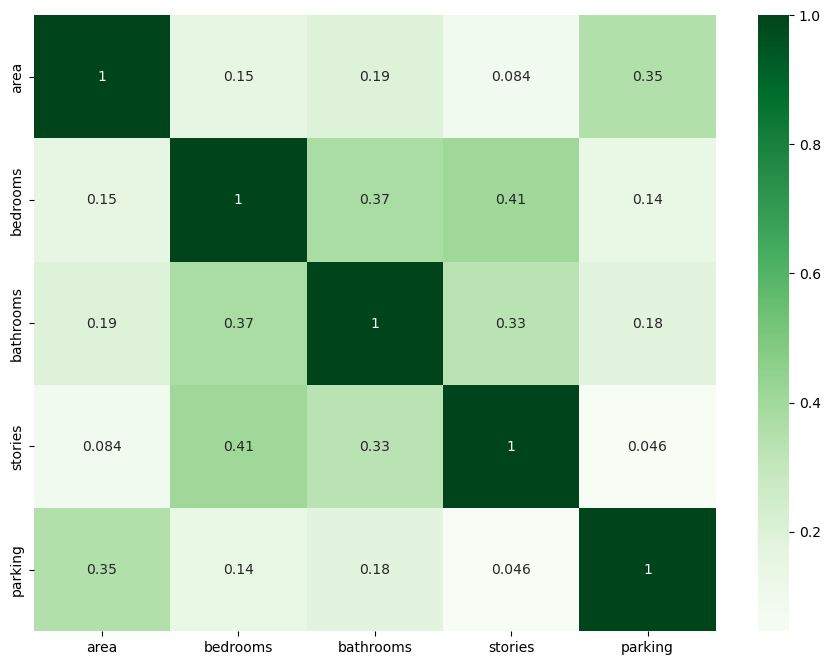

In [17]:
import seaborn as sns
from matplotlib import pyplot as plt
corr = data_df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

# Assumption 2: Normality(Optional)

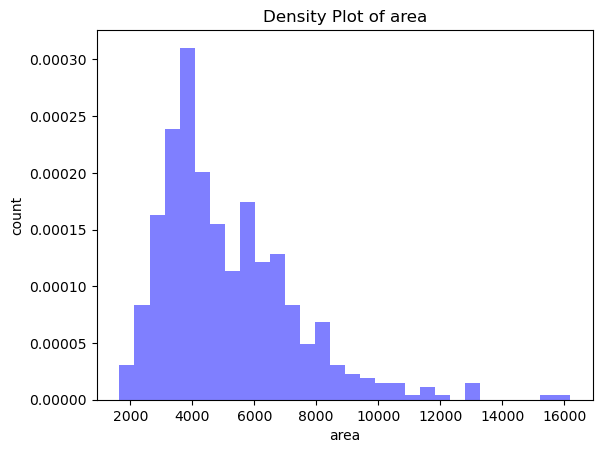

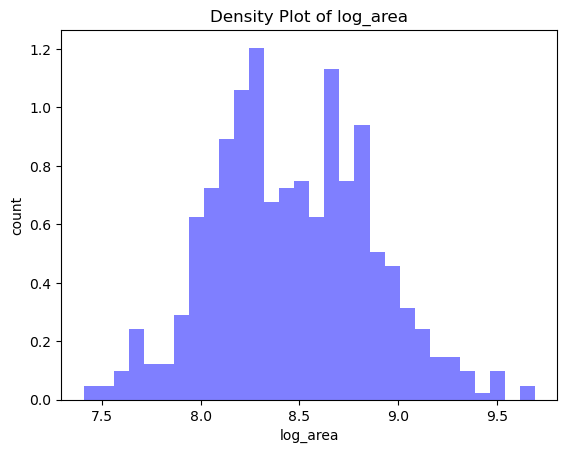

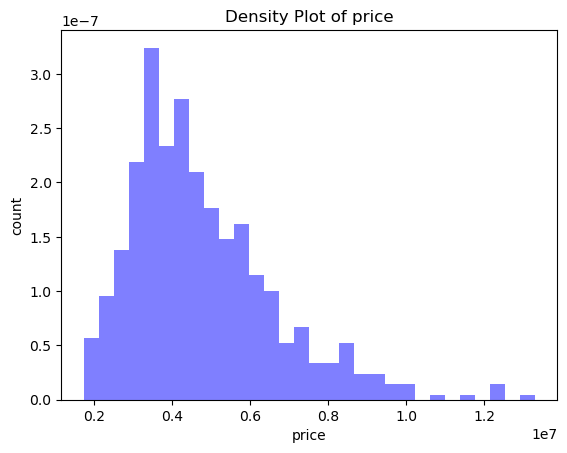

In [18]:
for col in cont_idvs+['price']:
    # Create a density plot using Matplotlib
    plt.hist(data_df[col], bins=30, density=True, alpha=0.5, color='blue')
    plt.title('Density Plot of {}'.format(col))
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()

# Step 4: Train & Test the Model

In [19]:
data_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,log_area,log_price
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,8.911934,16.403275
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,9.100526,16.321036
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,9.206332,16.321036
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,8.922658,16.318175
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,8.911934,16.250001


In [20]:
cat_cols = ['bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']
data_df_ = data_df.copy()
for col in cat_cols:
    encoded_columns = pd.get_dummies(data_df[col], drop_first=True, prefix=str(col))
    data_df_ = data_df_.join(encoded_columns).drop(col, axis=1)

In [22]:
data_df_.to_excel(os.getcwd()+"\Data\house_price_modelling_data.xlsx")

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [24]:
y = data_df_[['log_price']]
X = data_df_.drop(columns=['price', 'log_area', 'log_price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [25]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(381, 23) (164, 23) (381, 1) (164, 1)


In [26]:
LR = LinearRegression()
LR.fit(X_train, y_train)
predictions = LR.predict(X_test)

In [27]:
print(LR.score(X_test, y_test))
print(LR.coef_)
print(LR.intercept_)

0.6717243645115081
[[ 4.71200258e-05  3.89328616e-02  9.68732140e-02  8.22143849e-02
   7.55016036e-02  2.47552668e-01  1.90257305e-01  3.49886262e-01
   6.54726729e-01  7.74538485e-02  1.84768364e-01  3.13963100e-01
   1.40959261e-01  5.92249188e-02  1.30242922e-01  1.41230873e-01
   1.17801634e-01  8.50312481e-02  1.05775918e-01 -2.01040462e-02
   9.77965474e-02  9.06124286e-03 -1.08746235e-01]]
[14.60928]


In [28]:
dict(map(lambda i,j : (i,j) , X_train.columns,LR.coef_[0]))

{'area': 4.7120025763315603e-05,
 'bedrooms_2': 0.03893286157938899,
 'bedrooms_3': 0.09687321395207595,
 'bedrooms_4': 0.08221438490167587,
 'bedrooms_5': 0.07550160358216941,
 'bedrooms_6': 0.24755266790523248,
 'bathrooms_2': 0.19025730454248235,
 'bathrooms_3': 0.34988626247880206,
 'bathrooms_4': 0.6547267285440468,
 'stories_2': 0.07745384854850489,
 'stories_3': 0.18476836392928825,
 'stories_4': 0.3139630995605715,
 'mainroad_yes': 0.1409592606574175,
 'guestroom_yes': 0.059224918787277814,
 'basement_yes': 0.1302429219348236,
 'hotwaterheating_yes': 0.14123087290133612,
 'airconditioning_yes': 0.11780163430751303,
 'parking_1': 0.08503124811971173,
 'parking_2': 0.10577591762353405,
 'parking_3': -0.02010404624683618,
 'prefarea_yes': 0.09779654738409191,
 'furnishingstatus_semi-furnished': 0.009061242861848064,
 'furnishingstatus_unfurnished': -0.10874623543484385}

In [29]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score
mape = mean_absolute_percentage_error(y_test, predictions) 
rsq_ = r2_score(y_test, predictions, multioutput='raw_values') 
print("MAPE:",mape)
print("RSQ:",rsq_)

MAPE: 0.011500353507392718
RSQ: [0.67172436]


In [30]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score
mape = mean_absolute_percentage_error(y_test, predictions) 
rsq_ = r2_score(y_test, predictions, multioutput='raw_values') 
print("MAPE:",mape)
print("RSQ:",rsq_)

MAPE: 0.011500353507392718
RSQ: [0.67172436]


In [31]:
predictions = [math.exp(i) for i in predictions]
actuals = [math.exp(i) for i in y_test['log_price']]

In [32]:
mape = mean_absolute_percentage_error(actuals, predictions) 
rsq_ = r2_score(actuals, predictions, multioutput='raw_values') 
print("MAPE:",mape)
print("RSQ:",rsq_)

MAPE: 0.1820646501320653
RSQ: [0.69063769]


In [34]:
# print(LR.summary())